In [1]:
# IPython extension to reload modules before executing user code
%load_ext autoreload
%autoreload 2

In [2]:
import src.processing as prep
import src.utils as util
import json

In [3]:
with open('./config.json', 'r') as file:
    config = json.load(file)

config

{'resources_path': './resources/',
 'results_path': './results/',
 'numb_path': 'numb.wav',
 'hobbit_path': 'hobbit.wav',
 'noise_path': 'pink_noise.wav',
 'bandpass': {'lowcut': 300, 'highcut': 3000}}

In [4]:
resources_path = config['resources_path']
results_path = config['results_path']

numb_path = config['numb_path']
pink_noise_path = config['noise_path']
hobbit_path = config['hobbit_path']

low = config['bandpass']['lowcut']
high = config['bandpass']['highcut']

In [5]:
items = [
    {
    'signal_path':pink_noise_path,
    'filter':prep.bandpass_filter,
    'filter_name':'bandpass',
    'signal_name':'pink_noise',
    },
    {
    'signal_path':hobbit_path,
    'filter':prep.bandpass_filter,
    'filter_name':'bandpass',
    'signal_name':'hobbit',
    },
    {
    'signal_path':numb_path,
    'filter':prep.bandpass_filter,
    'filter_name':'bandpass',
    'signal_name':'linkin_park',
    },
    {
    'signal_path':pink_noise_path,
    'filter':prep.hilbert_filter,
    'filter_name':'hilbert',
    'signal_name':'pink_noise',
    },
    {
    'signal_path':hobbit_path,
    'filter':prep.hilbert_filter,
    'filter_name':'hilbert',
    'signal_name':'hobbit',
    },
    {
    'signal_path':numb_path,
    'filter':prep.hilbert_filter,
    'filter_name':'hilbert',
    'signal_name':'linkin_park',
    },   
]


In [6]:
def analyze(
        signal_path=None,
        filter=None,
        filter_name='',
        signal_name='',
        resources_path=resources_path,
        results_path=results_path,
):
    signal, fs = util.load_audio(resources_path + signal_path)

    print(signal_path)
    print(f"Audio Shape: {signal.shape}") 
    
    if filter_name.lower() == 'bandpass':    
        filter_output = filter(signal, low, high, fs)

    elif filter_name.lower() == 'hilbert':
        filter_output = filter(signal, fs) 

    util.save_audio(filter_output, fs, path=f'{results_path}{filter_name}_{signal_path}')
    
    util.plot_spectrogram(filter_output, fs, 
                          save_path=f'images/spectrogram_{filter_name}_{signal_name}.png',
                          title=f'Спектрограмма {signal_name} после фильтра {filter_name}')
    util.plot_spectral_analysis(signal, filter_output, fs, 
                                save_path=f'images/spectal_analysis_{filter_name}_{signal_name}.png',
                                title=f'Спектральный анализ {signal_name}: До & После "{filter_name}"')
    util.plot_amp_freq_response_of_signals(signal, filter_output, fs, 
                                           title=f'АЧХ {signal_name} До и После фильта {filter_name}',
                                           save_path=f'images/amp_freq_response_{filter_name}_{signal_name}.png')

pink_noise.wav
Audio Shape: (441001,)
Filtered audio saved as ./results/bandpass_pink_noise.wav


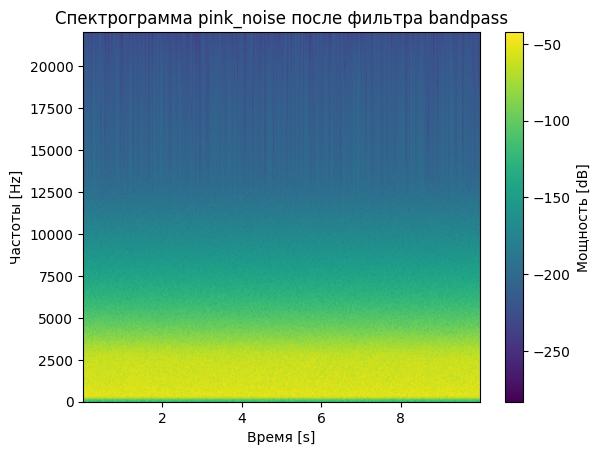

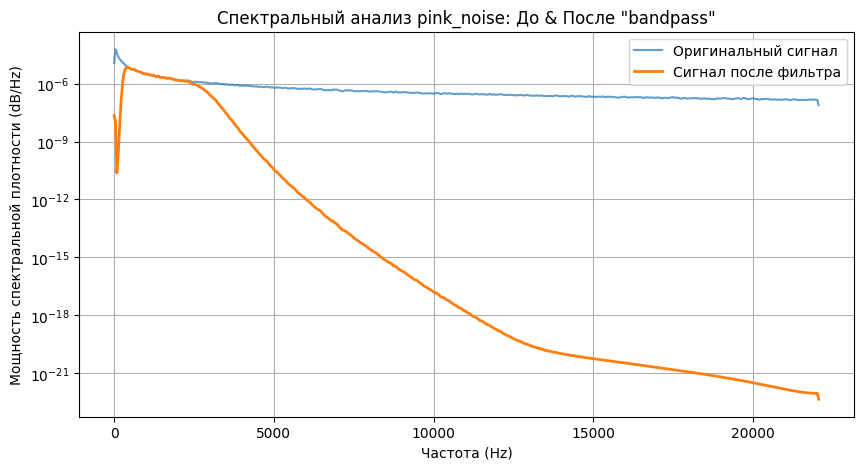

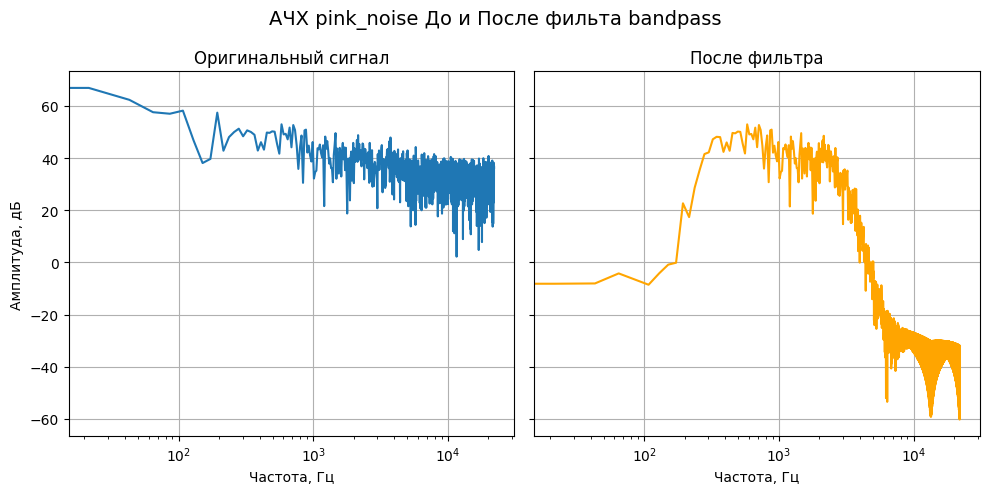

hobbit.wav
Audio Shape: (1234800, 2)
Filtered audio saved as ./results/bandpass_hobbit.wav


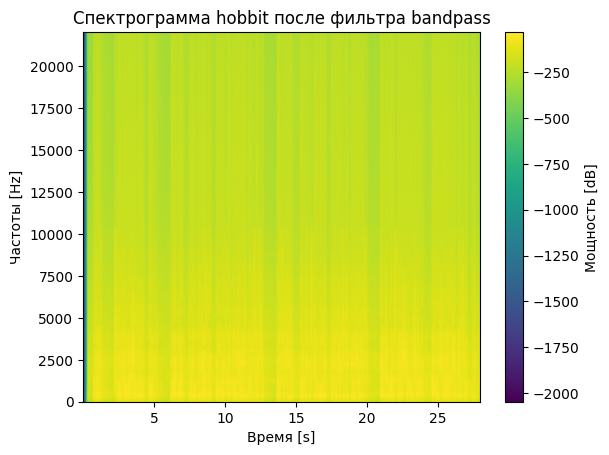

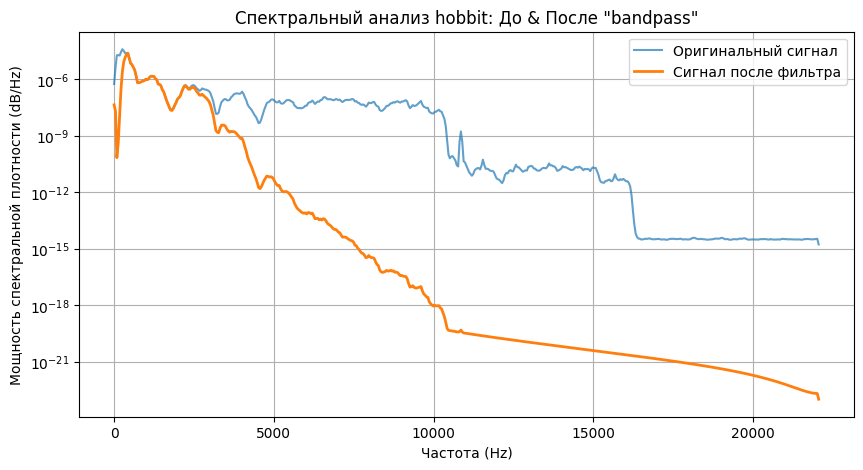

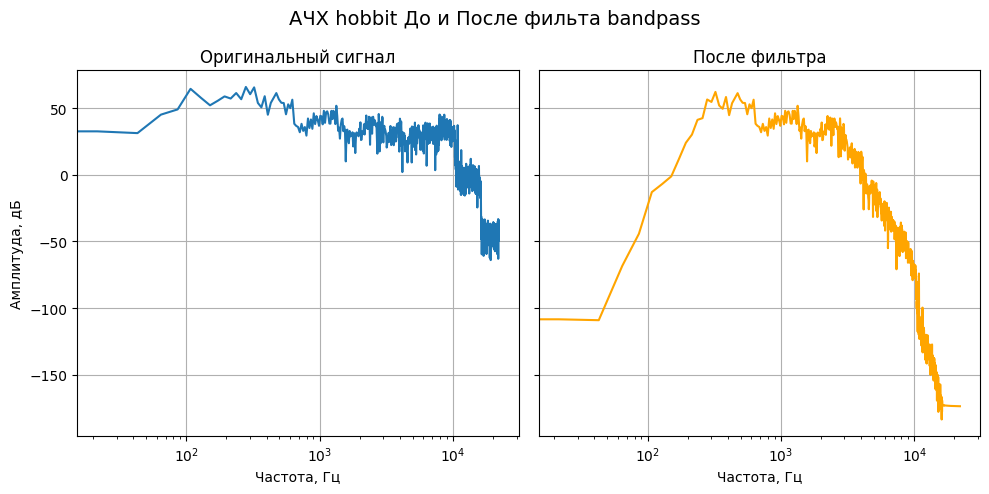

numb.wav
Audio Shape: (1764000, 2)
Filtered audio saved as ./results/bandpass_numb.wav


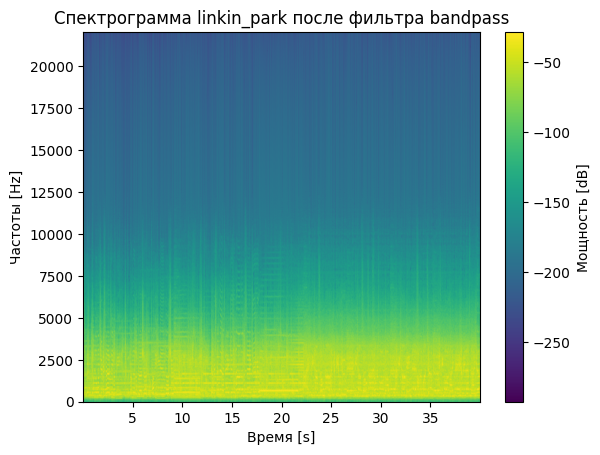

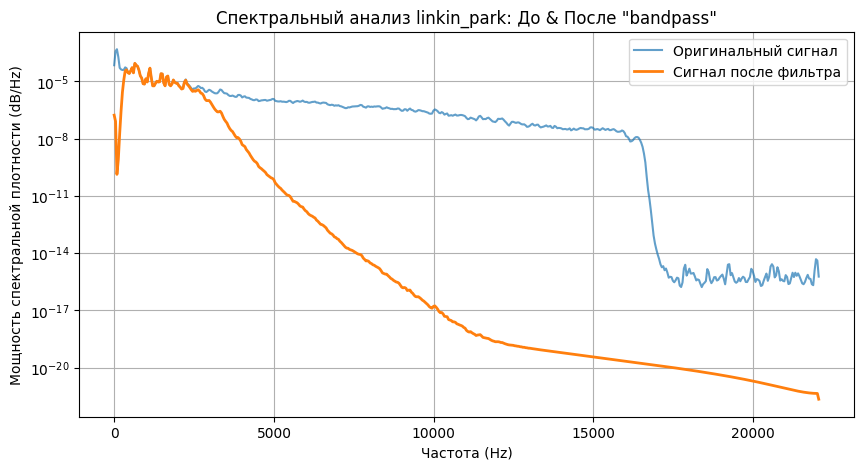

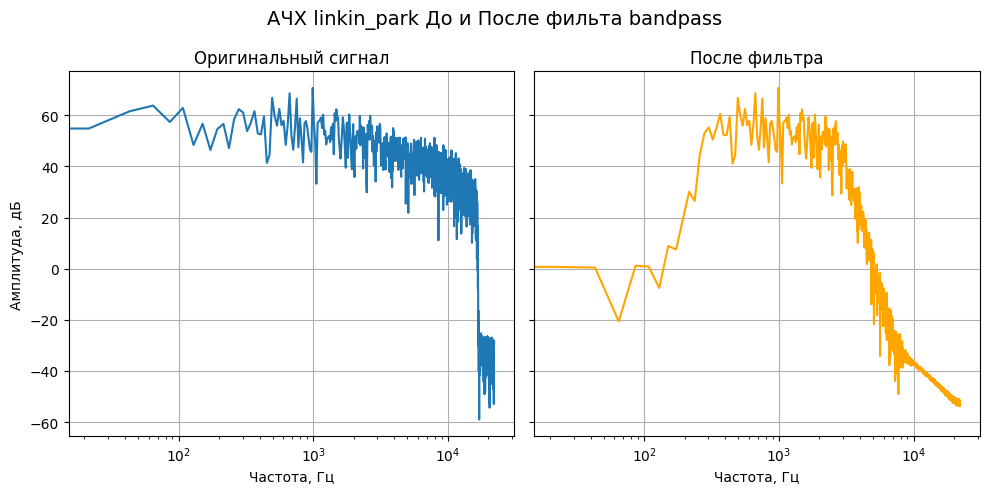

pink_noise.wav
Audio Shape: (441001,)
Filtered audio saved as ./results/hilbert_pink_noise.wav


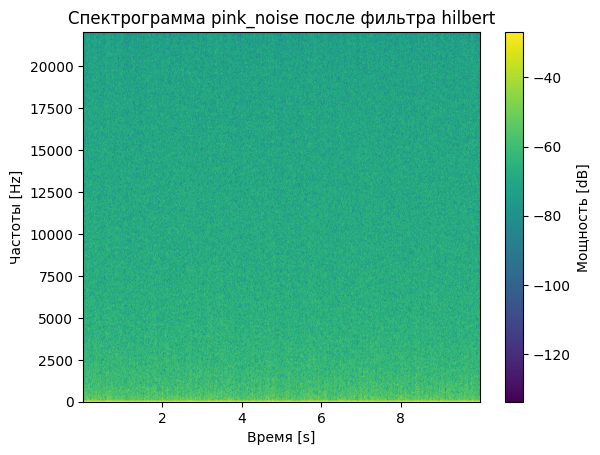

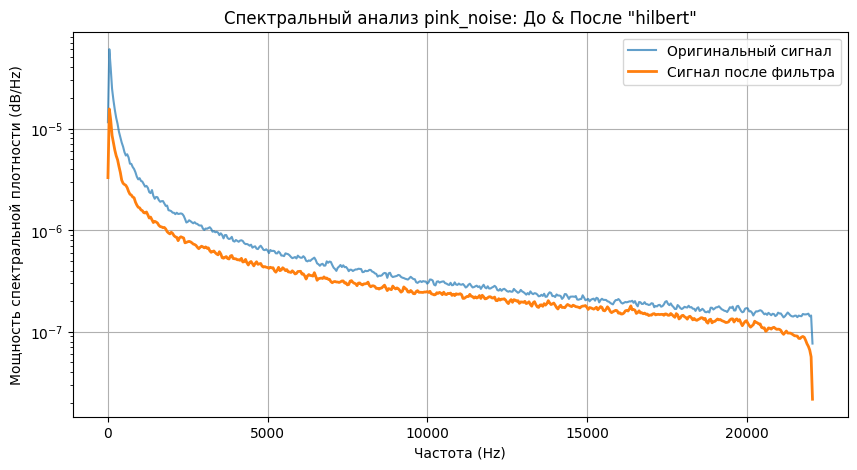

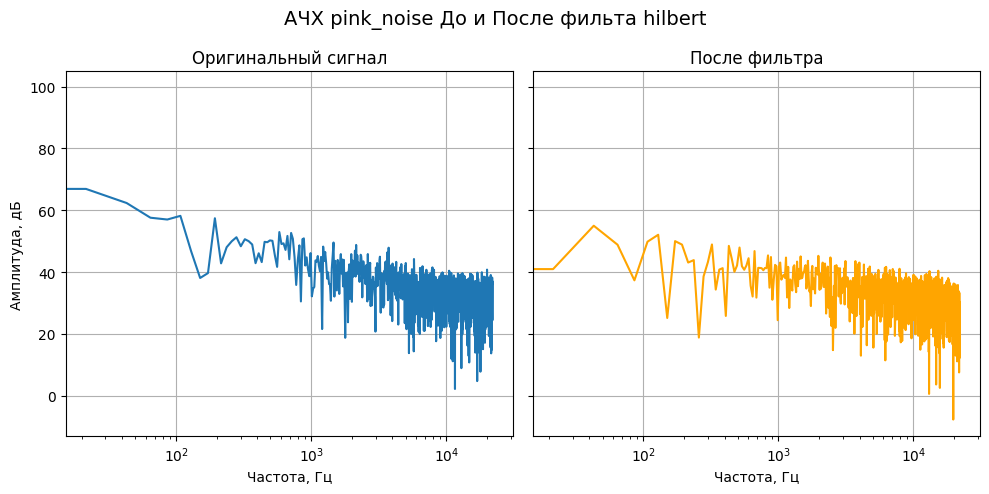

hobbit.wav
Audio Shape: (1234800, 2)
Filtered audio saved as ./results/hilbert_hobbit.wav


c:\Users\Loassar\Documents\University\semester2\speech_recognition\venv\Lib\site-packages\matplotlib\axes\_axes.py:8264: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


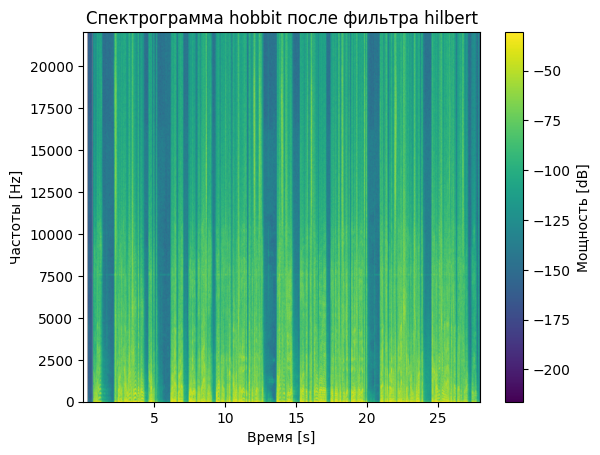

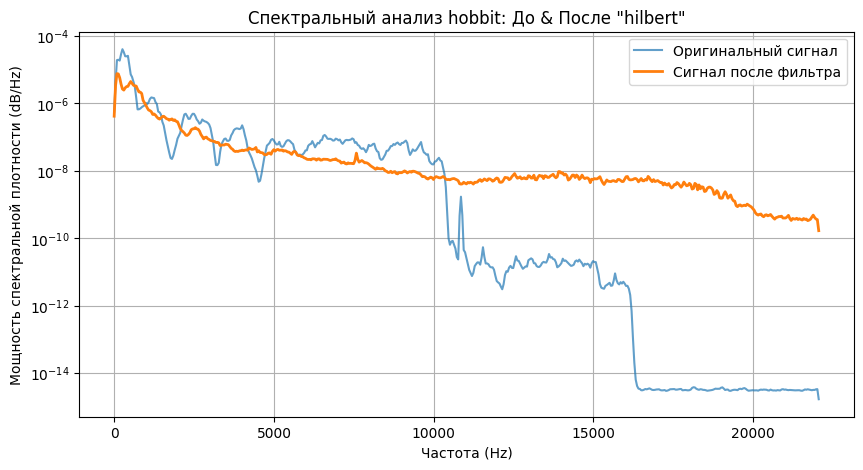

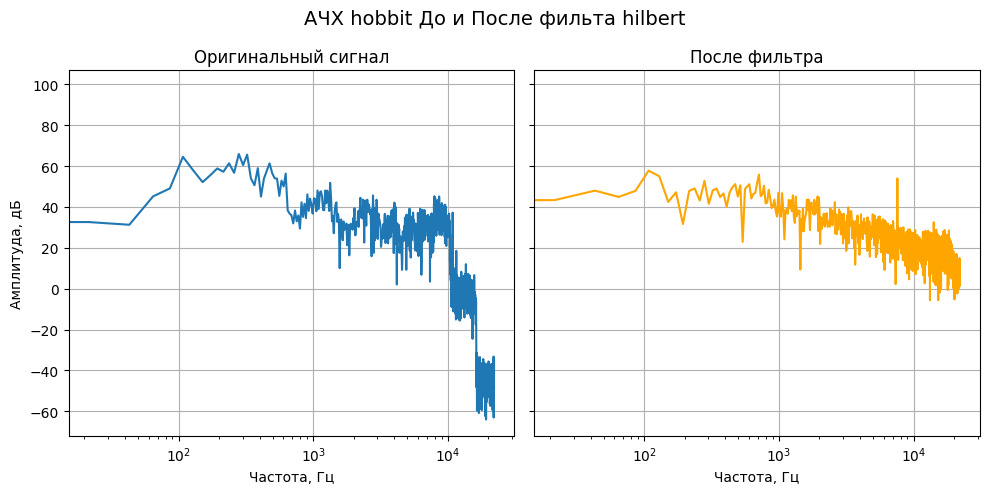

numb.wav
Audio Shape: (1764000, 2)
Filtered audio saved as ./results/hilbert_numb.wav


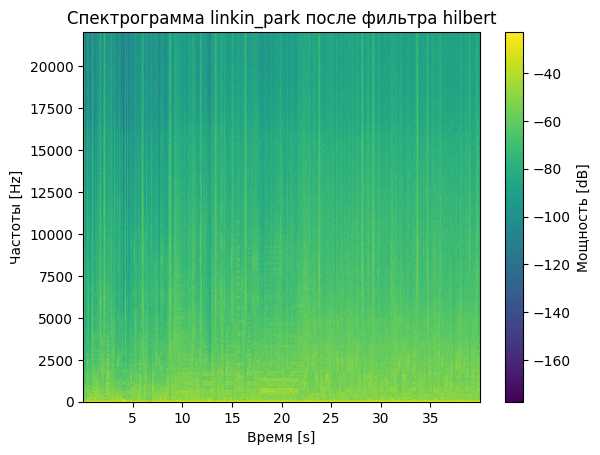

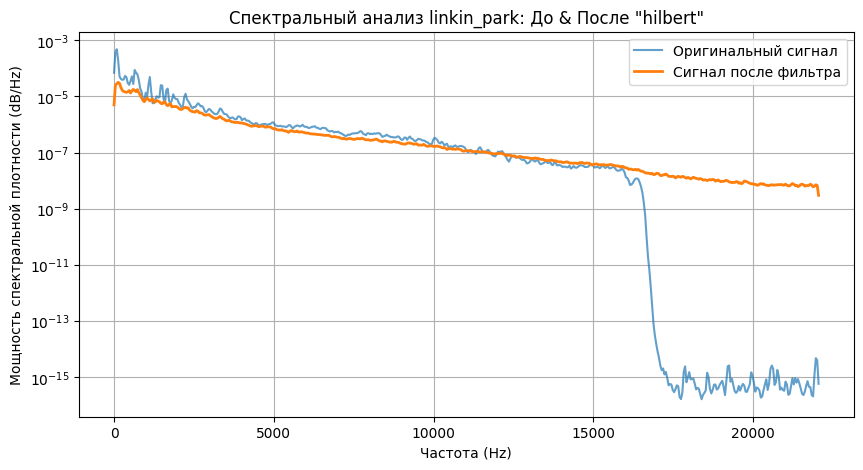

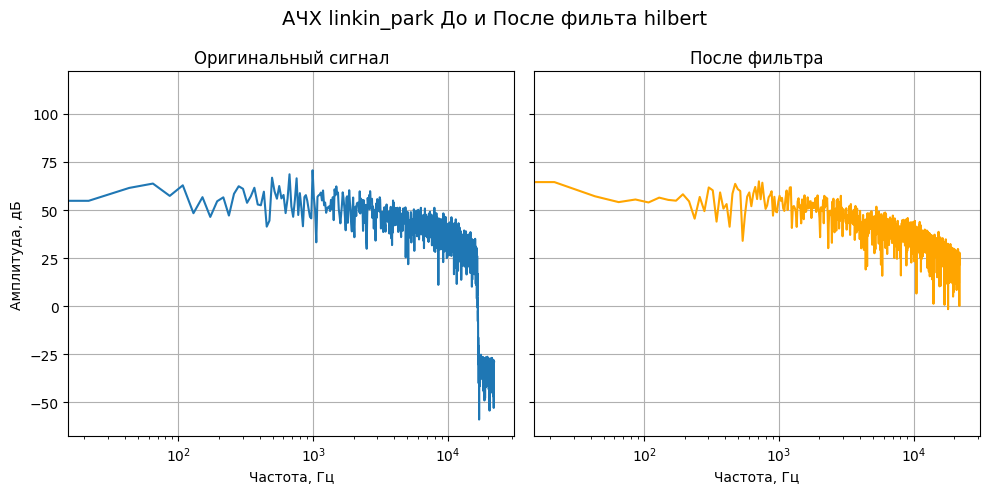

In [7]:
for item in items:
    analyze(
        signal_path=item['signal_path'],
        filter=item['filter'],
        filter_name=item['filter_name'],
        signal_name=item['signal_name'],        
    )